In [1]:
import os
import pandas as pd
from pandas import DataFrame
from keras.models import Sequential, Model, Sequential, load_model
from keras.layers import Dense, Input, Activation, Conv2D, MaxPool2D, Flatten, UpSampling2D, Conv2DTranspose, Reshape, LeakyReLU, Concatenate
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.utils import np_utils, plot_model
from keras import backend as K
import matplotlib.pyplot as plt
# matplotlib.use("TkAgg")
%matplotlib inline
import numpy as np
np.random.seed(1)
from sklearn.metrics import confusion_matrix
from PIL import Image
import random
import math
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import cluster, metrics

Using TensorFlow backend.


In [2]:
if not os.path.exists('model/'):
    os.makedirs('model/')

In [3]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
digit_size = 28
channels = 1
print('x_train\n', X_train.shape)
print('y_train\n', y_train.shape, y_train[0])
print('x_test\n', X_test.shape)
print('y_test\n', y_test.shape)

x_train
 (60000, 28, 28)
y_train
 (60000,) 5
x_test
 (10000, 28, 28)
y_test
 (10000,)


In [4]:
# data pre-processing
X_train = X_train.astype('float32') / 127.5 - 1       # minmax_normalized
X_test = X_test.astype('float32') / 127.5 - 1         # minmax_normalized
X_train = X_train.reshape((-1, digit_size*digit_size*channels))
X_test = X_test.reshape((-1, digit_size*digit_size*channels))
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [5]:
# in order to plot in a 2D figure
encoding_dim = 2

input_x = Input(shape=(digit_size*digit_size*channels,))
x = Dense(512, activation='tanh')(input_x)
x = Dense(256, activation='tanh')(x)
x = Dense(128, activation='tanh')(x)
x = Dense(64, activation='tanh')(x)
encoded = Dense(encoding_dim, name='encoder_output')(x)

input_ec = Input(shape=(encoding_dim,))
x = Dense(64, activation='tanh')(input_ec)
x = Dense(128, activation='tanh')(x)
x = Dense(256, activation='tanh')(x)
x = Dense(512, activation='tanh')(x)
decoded = Dense(digit_size*digit_size*channels, activation='tanh', name='decoder_output')(x)

encoder = Model(inputs=input_x, outputs=encoded)
decoder = Model(input_ec, decoded)

# del encoder
# encoder = load_model('model/tanh_encoder.h5')
# del decoder
# decoder = load_model('model/tanh_decoder.h5')

ec = encoder(input_x)
dc = decoder(ec)
autoencoder = Model(input_x, dc)

autoencoder.compile(loss='mse', optimizer=Adam())

encoder.summary()
decoder.summary()
autoencoder.summary()

W0709 12:08:36.266314 4474471872 deprecation_wrapper.py:119] From /Users/ianfan/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0709 12:08:36.277662 4474471872 deprecation_wrapper.py:119] From /Users/ianfan/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0709 12:08:36.280797 4474471872 deprecation_wrapper.py:119] From /Users/ianfan/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0709 12:08:36.380736 4474471872 deprecation_wrapper.py:119] From /Users/ianfan/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
encoder_output (Dense)       (None, 2)                 130       
Total params: 574,530
Trainable params: 574,530
Non-trainable params: 0
_________________________________________________________________
____

In [6]:
# training
autoencoder.fit(X_train, X_train, epochs=10, batch_size=256, shuffle=True)

encoder.save('model/tanh_encoder.h5')
decoder.save('model/tanh_decoder.h5')

W0709 12:08:36.554996 4474471872 deprecation_wrapper.py:119] From /Users/ianfan/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0709 12:08:36.708675 4474471872 deprecation_wrapper.py:119] From /Users/ianfan/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.2710
Epoch 2/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.2108
Epoch 3/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.1848
Epoch 4/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.1729
Epoch 5/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.1654
Epoch 6/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.1610
Epoch 7/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.1580
Epoch 8/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.1558
Epoch 9/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.1538
Epoch 10/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.1526


(10, 784)


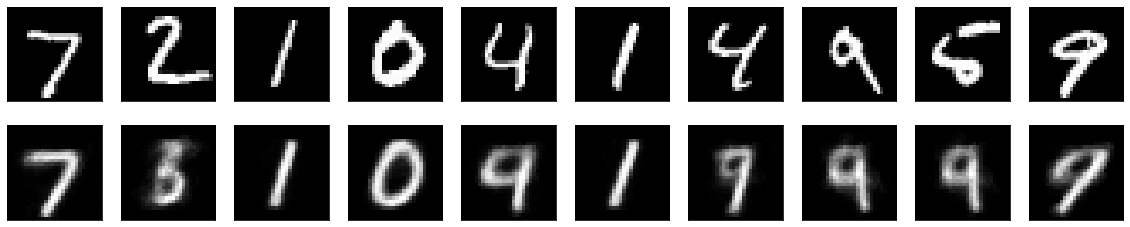

In [7]:
n = 10
decoded_imgs = autoencoder.predict(X_test[:n])
print(decoded_imgs.shape)
  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    if channels > 1:
        plt.imshow(X_test[i].reshape(digit_size, digit_size, channels), cmap='binary')
    else:
        plt.imshow(X_test[i].reshape(digit_size, digit_size))
        plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    if channels > 1:
        plt.imshow(decoded_imgs[i].reshape(digit_size, digit_size, channels), cmap='binary')
    else:
        plt.imshow(decoded_imgs[i].reshape(digit_size, digit_size))
        plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

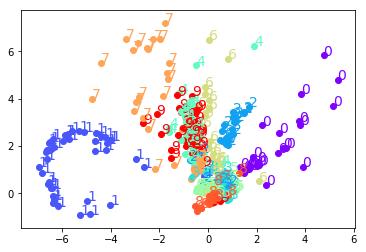

In [8]:
from matplotlib import cm

view_data = X_test[:300]
encoded_data = encoder.predict(view_data)
X, Y = encoded_data[:, 0], encoded_data[:, 1]

for x, y, s in zip(X, Y, y_test):
    c = cm.rainbow(int(255*s/9)); 
    plt.scatter(x, y, c=[c])
    plt.text(x, y, s, fontdict={'size': 14, 'color':c})

plt.show()

(225, 784)


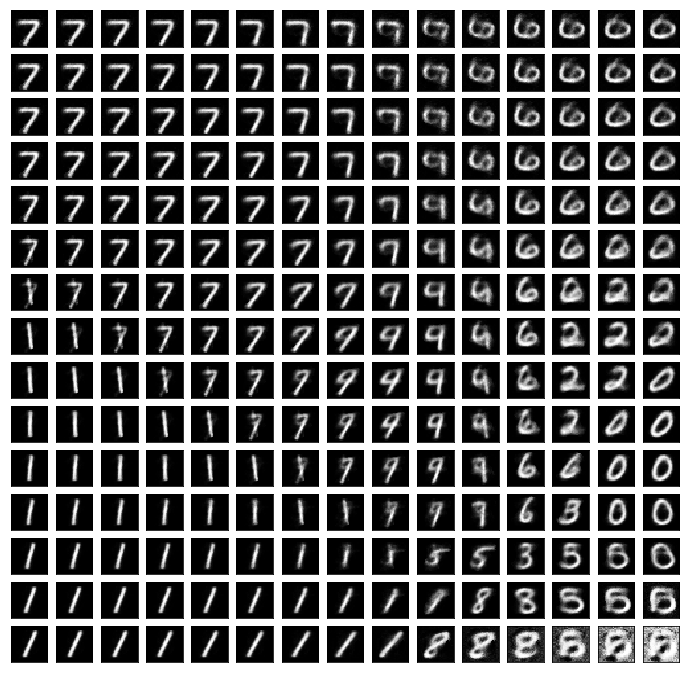

In [9]:
length = 15
x_lins = np.linspace(-6, 2, length, dtype=np.float32)
y_lins = np.linspace(-1, 8, length, dtype=np.float32)
data_draw = np.vstack([np.hstack((x_lins[:,np.newaxis], np.ones([length, 1])*y_lins[length-1-i])) for i in range(length)])
draw_ = decoder.predict(data_draw)
print(draw_.shape)
num = length*length
row = int(math.ceil(num/length))
fig, axes = plt.subplots(row, length, figsize=(length*(12/length), row*(12/length)))
for i, ax in enumerate(axes.flat):
    if channels > 1:
        ax.imshow(np.reshape(draw_[i],[digit_size, digit_size, channels]), cmap='binary')
    else:
        ax.imshow(np.reshape(draw_[i],[digit_size, digit_size]), cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

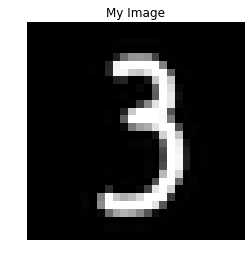

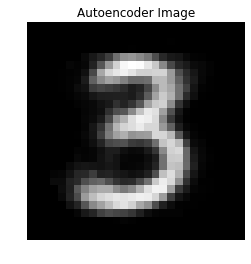

In [10]:
from PIL import Image
im = Image.open("./media/n_3.png")
if channels == 1:
    im = im.convert('L') # 轉成灰階
im = im.resize((digit_size, digit_size), Image.ANTIALIAS) # resize the image
im = np.array(im) #convert to an array
im2 = im.astype('float32') / 127.5 - 1 # normalise input
# 畫圖
plt.imshow(im2, cmap='gray')
plt.title('My Image')
plt.axis('off')
plt.show()

test_image = np.reshape(im2, [1,digit_size*digit_size*channels]) # reshape it to our input placeholder shape
d_ = autoencoder.predict(test_image)
# 畫圖
if channels > 1:
    plt.imshow(np.reshape(d_, (digit_size, digit_size, channels)), cmap='binary')
else:
    plt.imshow(np.reshape(d_, (digit_size, digit_size)), cmap='gray')
plt.title('Autoencoder Image')
plt.axis('off')
plt.show()